In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from nbodykit.lab import *
from nbodykit.source.catalog import ArrayCatalog
from nbodykit import setup_logging, style

import os
import matplotlib.pyplot as plt
plt.style.use(style.notebook)

import numpy as np
import math

In [3]:
setup_logging() # turn on logging to screen

In [4]:
#redshift = 0.5
#cosmo = cosmology.Planck15
LBox = 1024.0
Nparticles = 1024*1024*1024
print(Nparticles)
zredshift=0.5
Omega0 = 0.281
OmegaLambda = 0.719

1073741824


In [5]:
# Tune kmin and kmax according to particle positions ranges (length unit of the simulation box)
# Default kmax = kNyq = pi Nmesh/Lbox, and 2pi/Lbox its the minimum value of dk.
myNmesh=1024
#mykmin=0.000001
#mykmax=0.003
mykmin=0.001
mykmax=3.0
nkval=500
mydk=(mykmax-mykmin)/(nkval - 1)
xr1=0.01
xr2=10
yr1=1
yr2=100000
mylos=[0,0,1]
print('dk = ', mydk)

# To have units in Mpc
#kunit=1e3
#psunit=1e-9
kunit=1.0
psunit=1.0


sim_box_name = "F6_Box1_27"

('dk = ', 0.00601002004008016)


In [6]:
# define download dir for the data to the current directory
#download_dir = "."
#download_dir = "/Users/mar/Research/Codigos/NagBody_pkg/NagBody_sources/colas/mglpicola_fofr/runs/mglpicola_fofr/B0256_P0256_M0256_testing/F5/box5001/output/."
#download_dir = "/Users/mar/Research/Codigos/NagBody_pkg/NagBody_sources/colas/mglpicola_fofr/runs/mglpicola_fofr/B0256_P0256_M0256/F5/box5001/output/."
#download_dir = "./gadget_data_27"
download_dir = "../../../../halo_catalogues/F6/box1/27"

In [7]:
# NOTE: change this path if you downloaded the data somewhere else!
#data_path = os.path.join(download_dir, 'snapshot_z0p000.0')
#data_path = os.path.join(download_dir, 'snapshot_z0p000.*')
#data_path = os.path.join(download_dir, 'gadget.*')
data_path = os.path.join(download_dir, 'Rockstar_M200c_F6_B1_B1024_NP1024_S27.dat')


# initialize the Gadget1 catalog objects for data and randoms
#data = Gadget1Catalog(data_path)

# Reading file
inputFile = np.loadtxt(data_path)

massvec=inputFile[:,2]
npvec=inputFile[:,7]
xvec=inputFile[:,8]
yvec=inputFile[:,9]
zvec=inputFile[:,10]
vxvec=inputFile[:,11]
vyvec=inputFile[:,12]
vzvec=inputFile[:,13]
nval=massvec.shape[0]
npvecsum = np.sum(npvec)
print(nval)
print(npvecsum)
print(npvecsum/Nparticles)

#for i in range(0,nval):
#    xvec[i] = xvec[i]/LBox
#    yvec[i] = yvec[i]/LBox
#    zvec[i] = zvec[i]/LBox

arraya=np.array([xvec,yvec,zvec])
arrayb=np.transpose(arraya)
print arrayb

arrayva=np.array([vxvec,vyvec,vzvec])
arrayvb=np.transpose(arrayva)
print arrayvb


# generate the fake data
#data = numpy.empty(1024, dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
#data['Position'] = numpy.random.random(size=(1024, 3))
#data['Mass'] = numpy.random.random(size=1024)

data = numpy.empty(nval, dtype=[('Position', ('f8', 3)), ('Velocity', ('f8', 3)), ('Mass', 'f8')])
data['Position'] = arrayb
data['Velocity'] = arrayvb
data['Mass'] = massvec

print(data['Mass'])
print(data['Position'])
print(data['Velocity'])

2088610
272286591.0
0.2535866489633918
[[   5.05451   27.90979    7.1484 ]
 [   3.33114    2.02789    8.77102]
 [   6.93523   23.87998    3.54353]
 ...
 [1012.35187 1023.24255 1010.75012]
 [1018.56238 1010.28809 1012.22632]
 [1017.27716 1014.47455 1012.68018]]
[[-278.24  104.76 -227.02]
 [-329.8   229.61 -569.63]
 [-132.38   26.51  -21.53]
 ...
 [ 105.37    1.92 -635.62]
 [  -4.11  419.19 -788.22]
 [  99.76   56.81 -668.62]]
[2.886e+12 3.665e+12 1.404e+12 ... 2.418e+12 1.560e+11 2.184e+12]
[[   5.05451   27.90979    7.1484 ]
 [   3.33114    2.02789    8.77102]
 [   6.93523   23.87998    3.54353]
 ...
 [1012.35187 1023.24255 1010.75012]
 [1018.56238 1010.28809 1012.22632]
 [1017.27716 1014.47455 1012.68018]]
[[-278.24  104.76 -227.02]
 [-329.8   229.61 -569.63]
 [-132.38   26.51  -21.53]
 ...
 [ 105.37    1.92 -635.62]
 [  -4.11  419.19 -788.22]
 [  99.76   56.81 -668.62]]


In [8]:
# save to a npy file
numpy.save("npy-data.npy", data)

data = numpy.load("npy-data.npy")

# initialize the catalog
f = ArrayCatalog(data)

print(f)
print("columns = ", f.columns) # default Weight,Selection also present
print("total size = ", f.csize)


f = ArrayCatalog({'Position' : data['Position'], 'Velocity' : data['Velocity'], 'Mass' : data['Mass'] })

print(f)
print("columns = ", f.columns) # default Weight,Selection also present
print("total size = ", f.csize)

ArrayCatalog(size=2088610)
('columns = ', ['Mass', 'Position', 'Selection', 'Value', 'Velocity', 'Weight'])
('total size = ', 2088610)
ArrayCatalog(size=2088610)
('columns = ', ['Mass', 'Position', 'Selection', 'Value', 'Velocity', 'Weight'])
('total size = ', 2088610)


We can analyze the available columns in the catalogs via the ``columns`` attribute:

In [9]:
print('data columns = ', f.columns)
print(' ')
print('data = ', f.attrs)
print(' ')

Redshift = zredshift
az = 1./(Redshift+1)
#Hubble = 1.29127 * 100.0*data.attrs['HubbleParam']
print('Redshift =', Redshift)
print('a =', az)
#print('Hubble (z) =', Hubble)
aHofa = az*math.sqrt(Omega0/(az*az*az) + OmegaLambda)
print('aHofa =', aHofa)
#mpc_unit = 1000.0 # use 1.0 if units are Mpc.
mpc_unit = 1.0 # use 1.0 if units are Mpc.

('data columns = ', ['Mass', 'Position', 'Selection', 'Value', 'Velocity', 'Weight'])
 
('data = ', {})
 
('Redshift =', 0.5)
('a =', 0.6666666666666666)
('aHofa =', 0.8608458372760803)


In [10]:
pos = f['Position']
nsnap = pos.shape[0]
print(nsnap)
print(pos)
vel=f['Velocity']
print(vel)

2088610
dask.array<array, shape=(2088610, 3), dtype=float64, chunksize=(100000, 3)> first: [ 5.05451 27.90979  7.1484 ] last: [1017.27716 1014.47455 1012.68018]
dask.array<array, shape=(2088610, 3), dtype=float64, chunksize=(100000, 3)> first: [-278.24  104.76 -227.02] last: [  99.76   56.81 -668.62]


In [11]:
# convert to a MeshSource, using TSC interpolation on 256^3 mesh:: tsc or cic
mesh = f.to_mesh(resampler='cic', BoxSize=LBox, Nmesh=myNmesh, compensated=True, position='Position',weight='Mass')
#mesh = data.to_mesh(resampler='tsc', Nmesh=myNmesh, compensated=True, position='Position',interlaced=True)

In [12]:
print("mesh = ", mesh)

('mesh = ', (ArrayCatalog(size=2088610) as CatalogMesh))


In [13]:
# compute the power, specifying desired linear k-binning
r = FFTPower(mesh, mode='1d', dk=mydk, kmin=mykmin, kmax=mykmax)

[ 000280.37 ]   0: 10-16 09:08  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 2088610 
[ 000282.79 ]   0: 10-16 09:08  CatalogMesh     INFO     painted 2088610 out of 2088610 objects to mesh
[ 000283.13 ]   0: 10-16 09:08  CatalogMesh     INFO     painted 2088610 out of 2088610 objects to mesh
[ 000283.13 ]   0: 10-16 09:08  CatalogMesh     INFO     mean particles per cell is 1.20085e+10
[ 000283.13 ]   0: 10-16 09:08  CatalogMesh     INFO     sum is 1.28941e+19 
[ 000283.96 ]   0: 10-16 09:08  CatalogMesh     INFO     normalized the convention to 1 + delta
[ 000306.64 ]   0: 10-16 09:08  CatalogMesh     INFO     field: (ArrayCatalog(size=2088610) as CatalogMesh) painting done


In [14]:
# the result is stored at "power" attribute
Pk = r.power
print(Pk)

<BinnedStatistic: dims: (k: 499), variables: ('k', 'power', 'modes')>


In [15]:
print(Pk.coords)

{'k': array([0.00400501, 0.01001503, 0.01602505, 0.02203507, 0.02804509,
       0.03405511, 0.04006513, 0.04607515, 0.05208517, 0.05809519,
       0.06410521, 0.07011523, 0.07612525, 0.08213527, 0.08814529,
       0.09415531, 0.10016533, 0.10617535, 0.11218537, 0.11819539,
       0.12420541, 0.13021543, 0.13622545, 0.14223547, 0.14824549,
       0.15425551, 0.16026553, 0.16627555, 0.17228557, 0.17829559,
       0.18430561, 0.19031563, 0.19632565, 0.20233567, 0.20834569,
       0.21435571, 0.22036573, 0.22637575, 0.23238577, 0.23839579,
       0.24440581, 0.25041583, 0.25642585, 0.26243587, 0.26844589,
       0.27445591, 0.28046593, 0.28647595, 0.29248597, 0.29849599,
       0.30450601, 0.31051603, 0.31652605, 0.32253607, 0.32854609,
       0.33455611, 0.34056613, 0.34657615, 0.35258617, 0.35859619,
       0.36460621, 0.37061623, 0.37662625, 0.38263627, 0.38864629,
       0.39465631, 0.40066633, 0.40667635, 0.41268637, 0.41869639,
       0.42470641, 0.43071643, 0.43672645, 0.44273647, 0

In [16]:
# Saving to file PS vs k
kvec=Pk['k'] * kunit
pkvec=Pk['power'].real * psunit
pkvec2=(Pk['power'].real - Pk.attrs['shotnoise']) * psunit

nk = kvec.shape[0]

print(nk)

pofka=np.array([kvec,pkvec,pkvec2])
pofkb=np.transpose(pofka)
print pofkb

pofk_txt_name = 'pofk_'+sim_box_name+'.dat'

np.savetxt(pofk_txt_name,pofkb,delimiter='\t',newline='\r\n')

499
[[6.13592332e-03 5.90690885e+04 5.51629637e+04]
 [1.01070383e-02 6.94828942e+04 6.55767694e+04]
 [1.61166509e-02 9.25668389e+04 8.86607141e+04]
 ...
 [2.98497407e+00 4.26527172e+03 3.59146884e+02]
 [2.99097787e+00 4.26520349e+03 3.59078654e+02]
 [2.99698720e+00 4.26021760e+03 3.54092764e+02]]


In [17]:
# print out the meta-data
for k in Pk.attrs:
    print("%s = %s" %(k, str(Pk.attrs[k])))

Nmu = 1
Nmesh = [1024 1024 1024]
dk = 0.00601002004008
kmin = 0.001
BoxSize = [1024. 1024. 1024.]
volume = 1073741824.0
los = [0, 0, 1]
kmax = 3.0
poles = []
mode = 1d
N1 = 2088610
N2 = 2088610
shotnoise = 3906.124836299362
Lz = 1024.0
Lx = 1024.0
Ly = 1024.0


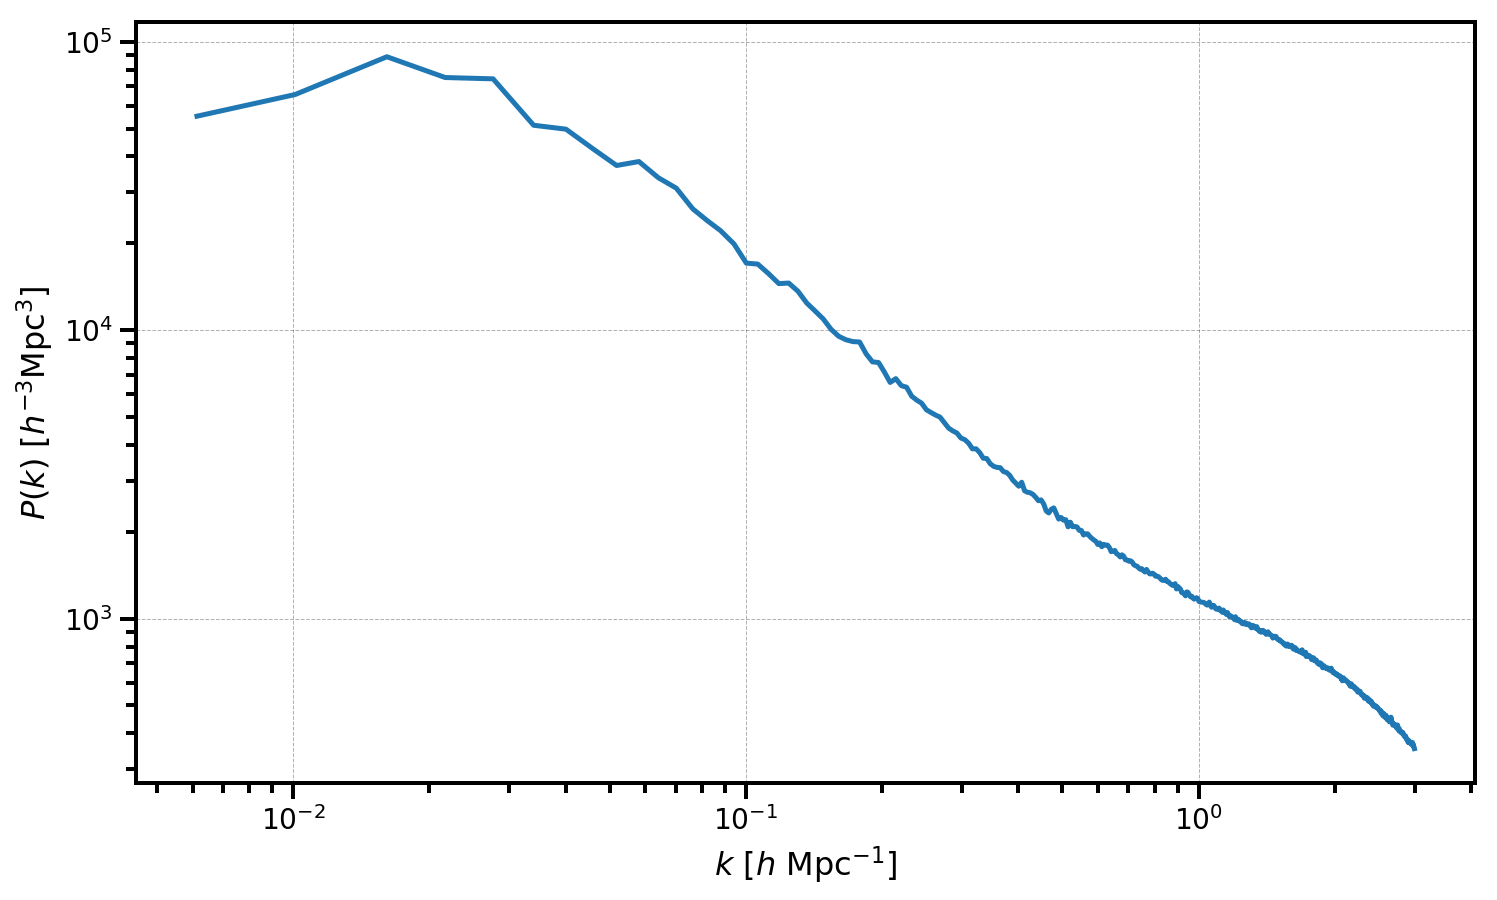

In [18]:
fig1 = plt.figure()

# print the shot noise subtracted P(k)
plt.loglog(Pk['k']*kunit, (Pk['power'].real - Pk.attrs['shotnoise'])*psunit)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
#plt.xlim(0.001, 0.6)
#plt.xlim(0.01, 10.0)
#plt.ylim(1,100000)

pofk_pdf_name = 'pofk_'+sim_box_name+'.pdf'

fig1.savefig(pofk_pdf_name)

In [20]:
# add RSD
#aS = 1/(1+0.5)
#print(aS)
print(math.sqrt(2./3.))
#anum = 13.60 # 1000/69.7 # 1000. / ( sqrt(2/3) *1.29127 * 100 * 0.697 ) ; H in km/s/Mpc.
anum = 13.60 * math.sqrt(2./3.)
# Using the formula: s = x + v_p.n_z / (a H) = x + sqrt(a) V_gadget*n_z /(a H)
#                      = x + V_gadget*n_z /(sqrt(a) H), H = 100 h, in km/s/kpc.
print(anum)
#data['RSDPosition'] = data['Position'] + data['GadgetVelocity'] * mylos
#data['RSDPosition'] = data['Position'] + data['GadgetVelocity']*mylos*math.sqrt(az)/Hubble
vnorm = mpc_unit /(100.0*aHofa)/math.sqrt(1.0 + Redshift)
print('vnorm =', vnorm)
#data['RSDPosition'] = data['Position'] + anum* data['GadgetVelocity'] * mylos
f['RSDPosition'] = f['Position'] + vnorm * f['Velocity'] * mylos

0.816496580928
11.1043535006
('vnorm =', 0.009484817670853986)


In [22]:
# convert to a MeshSource, using TSC (or CIC) interpolation on 256^3 mesh
mesh_rsd = f.to_mesh(resampler='cic', BoxSize=LBox, Nmesh=myNmesh, compensated=True, position='RSDPosition',weight='Mass')

In [23]:
# compute the 2D power AND ell=0,2,4 multipoles
r = FFTPower(mesh_rsd, mode='2d', dk=mydk, kmin=mykmin, kmax=mykmax, Nmu=5, los=mylos, poles=[0,2,4])

[ 000743.41 ]   0: 10-16 09:16  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 2088610 
[ 000745.62 ]   0: 10-16 09:16  CatalogMesh     INFO     painted 2088610 out of 2088610 objects to mesh
[ 000745.93 ]   0: 10-16 09:16  CatalogMesh     INFO     painted 2088610 out of 2088610 objects to mesh
[ 000745.94 ]   0: 10-16 09:16  CatalogMesh     INFO     mean particles per cell is 1.20085e+10
[ 000745.94 ]   0: 10-16 09:16  CatalogMesh     INFO     sum is 1.28941e+19 
[ 000746.69 ]   0: 10-16 09:16  CatalogMesh     INFO     normalized the convention to 1 + delta
[ 000765.86 ]   0: 10-16 09:16  CatalogMesh     INFO     field: (ArrayCatalog(size=2088610) as CatalogMesh) painting done


In [24]:
poles = r.poles
print(poles)
print("variables = ", poles.variables)

print(poles)

<BinnedStatistic: dims: (k: 499), variables: 5 total>
('variables = ', ['k', 'power_0', 'power_2', 'power_4', 'modes'])
<BinnedStatistic: dims: (k: 499), variables: 5 total>


In [25]:
# Save to a file
kvec=poles['k'] * kunit
pk0vec=poles['power_0'].real * psunit
pk2vec=poles['power_2'].real * psunit
pk4vec=poles['power_4'].real * psunit
pk0vec2=(poles['power_0'].real - poles.attrs['shotnoise']) * psunit

nk = kvec.shape[0]

print(nk)
print(pk0vec)

#pofka=np.array([kvec,pk0vec,pk2vec,pk4vec,kvec*pk0vec,kvec*pk2vec,kvec*pk4vec])
pofka=np.array([kvec,pk0vec,pk2vec,pk4vec,pk0vec2])

pofkb=np.transpose(pofka)
print pofkb

pofk_rsd_txt_name = 'pofk_rsd_mu_2d_l_'+sim_box_name+'.dat'

np.savetxt(pofk_rsd_txt_name,pofkb,delimiter='\t',newline='\r\n')

499
[ 62373.53125     81421.35576923 110937.61111111  91606.26865672
  94008.17829457  65951.08292683  64816.24291498  54883.47953216
  47542.5404157   49641.70598291  44462.69923664  40886.96296296
  35344.27471384  32433.23349754  30282.51851852  27157.50819672
  24380.22996942  23910.71123288  22520.96987654  21153.2776618
  21157.13018944  19961.98773891  18441.59623782  17586.5254902
  16732.59714845  15737.71030209  15184.73083197  14748.59655998
  14468.53782229  14425.30281823  13462.94870401  12878.67490399
  12702.92693845  12068.29185072  11514.73558427  11362.49914033
  11063.77864029  11033.64426877  10411.97320922  10219.82668828
  10012.96656723   9684.94935841   9493.2873521    9514.32025259
   9164.52881808   9061.89410689   8803.16435554   8442.98865429
   8393.2661912    8229.32435526   8093.52507911   7993.33875508
   7877.5067966    7685.81596673   7571.71937461   7335.8275768
   7332.02137245   7141.67243757   7025.57807358   7044.58215603
   6950.0496968    6886.

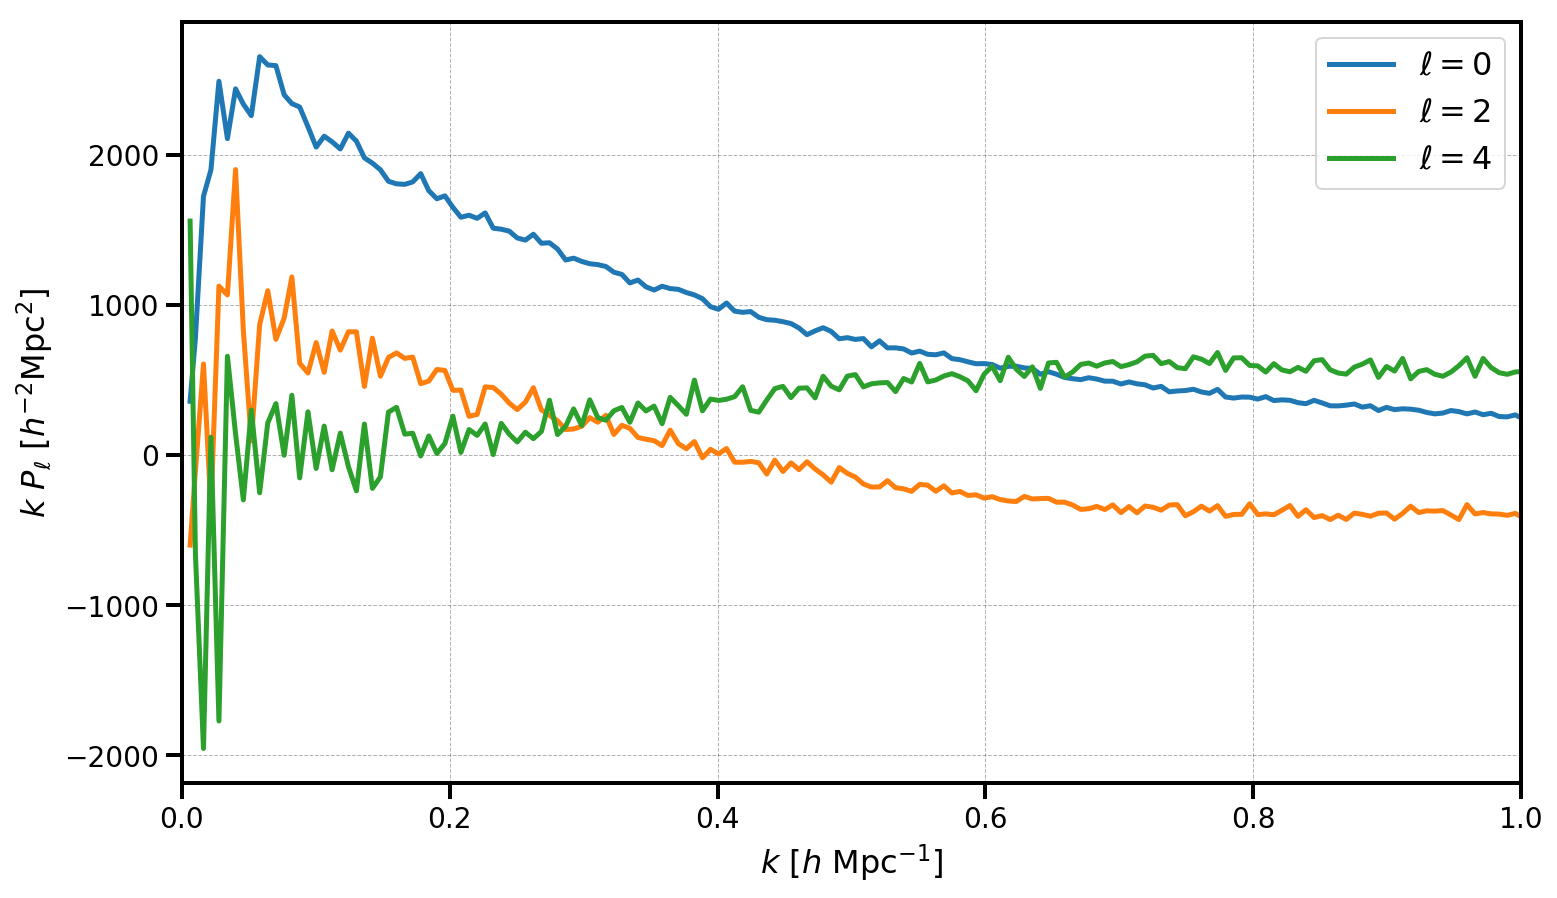

In [26]:
fig5 = plt.figure()

for ell in [0, 2, 4]:
    label = r'$\ell=%d$' % (ell)
    P = poles['power_%d' %ell].real
    if ell == 0: P = P - poles.attrs['shotnoise']
    plt.plot(poles['k']*kunit, poles['k']*kunit * P*psunit, label=label)


#        plt.plot(poles['k'], P, label=label)
#    plt.plot(poles['k'], poles['k'] * P, label=label)


# format the axes
plt.legend(loc=0)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
plt.xlim(0.0, 1)
#plt.ylim(-1000,3000)
#plt.ylim(-2000,3000)

pofk_rsd_pdf_name = 'pofk_rsd_mu_2d_l_'+sim_box_name+'.pdf'

fig5.savefig(pofk_rsd_pdf_name)